In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.callbacks import TensorBoard

In [2]:
tbCallBack = TensorBoard(log_dir='./In', histogram_freq=0, write_graph=True, write_images=True)
train_dir = 'NewDataset/train'
val_dir = 'NewDataset/val'
img_width, img_height = 75, 75
input_shape = (img_width, img_height, 3)
epochs = 25
batch_size = 16
nb_train_samples = 145968
nb_validation_samples = 21278
#nb_test_samples = 1560

In [3]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [4]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')

Found 145968 images belonging to 22 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')

Found 21278 images belonging to 22 classes.


In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.python.keras import optimizers, losses, activations, models
from tensorflow.python.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.python.keras import applications
from tensorflow.python.keras.optimizers import Adam

In [7]:
base_model = applications.InceptionV3(weights=None, 
                                include_top=False, 
                                input_shape=(75, 75,3))

In [8]:
base_model.trainable = True

add_model = Sequential()
add_model.add(base_model)
add_model.add(Flatten())
add_model.add(Dense(1024))
add_model.add(Activation('relu'))
add_model.add(Dropout(0.25))
add_model.add(Dense(22))
add_model.add(Activation('softmax'))#sigmoid

model = add_model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=1e-5), 
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
activation_94 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                22550     
_________________________________________________________________
activation_95 (Activation)   (None, 22)                0         
Total para

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[tbCallBack])

In [ ]:
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
symb = ['0','1','2','3','4','5','6','7','8','9','A','B','C','E','H','K','M','P','T','X','У']
image_file_name = '11111.png'
img = image.load_img(image_file_name, target_size=(75, 75))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
pred = model.predict(img_array).argmax()
print(symb[pred])
plt.imshow(img)

In [22]:
print("Сохранение")
model_json = model.to_json()
json_file = open("NewDatIncept.json","w")
json_file.write(model_json)
json_file.close()
model.save_weights("NewDatIncept.h5")

Сохранение


In [ ]:
base_model.summary()

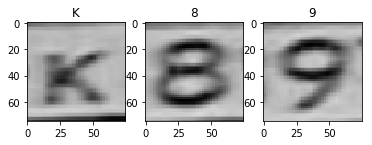

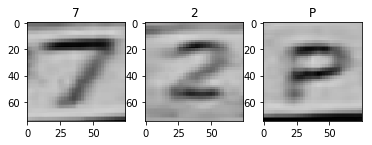

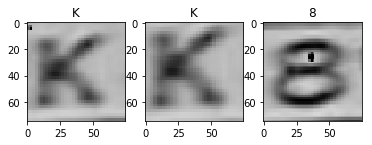

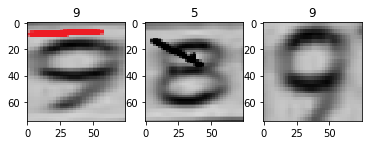

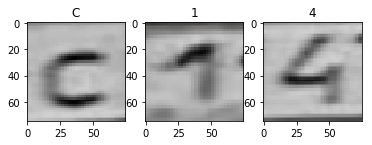

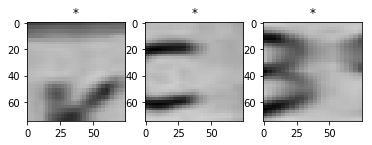

In [21]:
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
symb = ['0','1','2','3','4','5','6','7','8','9','A','B','C','E','H','K','M','P','T','X','У','*']
image_file_name = '1.png'
img = image.load_img(image_file_name, target_size=(75, 75))
image_file_name1 = '2.png'
img1 = image.load_img(image_file_name1, target_size=(75, 75))
image_file_name2 = '3.png'
img2 = image.load_img(image_file_name2, target_size=(75, 75))
image_file_name3 = '4.png'
img3 = image.load_img(image_file_name3, target_size=(75, 75))
image_file_name4 = '10.png'
img4 = image.load_img(image_file_name4, target_size=(75, 75))
image_file_name5 = '5.png'
img5 = image.load_img(image_file_name5, target_size=(75, 75))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
img_array1 = image.img_to_array(img1)
img_array1 = np.expand_dims(img_array1, axis=0)
img_array1 /= 255.
img_array2 = image.img_to_array(img2)
img_array2 = np.expand_dims(img_array2, axis=0)
img_array2 /= 255.
img_array3 = image.img_to_array(img3)
img_array3 = np.expand_dims(img_array3, axis=0)
img_array3 /= 255.
img_array4 = image.img_to_array(img4)
img_array4 = np.expand_dims(img_array4, axis=0)
img_array4 /= 255.
img_array5 = image.img_to_array(img5)
img_array5 = np.expand_dims(img_array5, axis=0)
img_array5 /= 255.
#pred = model.predict(img_array).argmax()
#print(symb[pred])
#fig, axs = plt.subplots(2, 3, figsize=(20, 20))
#axs[0].imshow(img)
#axs[1].imshow(img1)
fig, (ax1) = plt.subplots(1,3)
pred = model.predict(img_array).argmax()
ax1[0].set_title(symb[pred])
ax1[0].imshow(img)
pred1 = model.predict(img_array1).argmax()
ax1[1].set_title(symb[pred1])
ax1[1].imshow(img1)
pred2 = model.predict(img_array2).argmax()
ax1[2].set_title(symb[pred2])
ax1[2].imshow(img2)
fig, (ax2) = plt.subplots(1,3)
pred3 = model.predict(img_array3).argmax()
ax2[0].set_title(symb[pred3])
ax2[0].imshow(img3)
pred4 = model.predict(img_array4).argmax()
ax2[1].set_title(symb[pred4])
ax2[1].imshow(img4)
pred5 = model.predict(img_array5).argmax()
ax2[2].set_title(symb[pred5])
ax2[2].imshow(img5)
image_file_name = '111.png'
img = image.load_img(image_file_name, target_size=(75, 75))
image_file_name1 = '11111.png'
img1 = image.load_img(image_file_name1, target_size=(75, 75))
image_file_name2 = '888.png'
img2 = image.load_img(image_file_name2, target_size=(75, 75))
image_file_name3 = '999.png'
img3 = image.load_img(image_file_name3, target_size=(75, 75))
image_file_name4 = '8888.png'
img4 = image.load_img(image_file_name4, target_size=(75, 75))
image_file_name5 = '9999.png'
img5 = image.load_img(image_file_name5, target_size=(75, 75))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
img_array1 = image.img_to_array(img1)
img_array1 = np.expand_dims(img_array1, axis=0)
img_array1 /= 255.
img_array2 = image.img_to_array(img2)
img_array2 = np.expand_dims(img_array2, axis=0)
img_array2 /= 255.
img_array3 = image.img_to_array(img3)
img_array3 = np.expand_dims(img_array3, axis=0)
img_array3 /= 255.
img_array4 = image.img_to_array(img4)
img_array4 = np.expand_dims(img_array4, axis=0)
img_array4 /= 255.
img_array5 = image.img_to_array(img5)
img_array5 = np.expand_dims(img_array5, axis=0)
img_array5 /= 255.
#pred = model.predict(img_array).argmax()
#print(symb[pred])
#fig, axs = plt.subplots(2, 3, figsize=(20, 20))
#axs[0].imshow(img)
#axs[1].imshow(img1)
fig, (ax1) = plt.subplots(1,3)
pred = model.predict(img_array).argmax()
ax1[0].set_title(symb[pred])
ax1[0].imshow(img)
pred1 = model.predict(img_array1).argmax()
ax1[1].set_title(symb[pred1])
ax1[1].imshow(img1)
pred2 = model.predict(img_array2).argmax()
ax1[2].set_title(symb[pred2])
ax1[2].imshow(img2)
fig, (ax2) = plt.subplots(1,3)
pred3 = model.predict(img_array3).argmax()
ax2[0].set_title(symb[pred3])
ax2[0].imshow(img3)
pred4 = model.predict(img_array4).argmax()
ax2[1].set_title(symb[pred4])
ax2[1].imshow(img4)
pred5 = model.predict(img_array5).argmax()
ax2[2].set_title(symb[pred5])
ax2[2].imshow(img5)
image_file_name = '7.png'
img = image.load_img(image_file_name, target_size=(75, 75))
image_file_name1 = '8.png'
img1 = image.load_img(image_file_name1, target_size=(75, 75))
image_file_name2 = '9.png'
img2 = image.load_img(image_file_name2, target_size=(75, 75))
image_file_name3 = 'musor4.png'
img3 = image.load_img(image_file_name3, target_size=(75, 75))
image_file_name4 = 'musor1.png'
img4 = image.load_img(image_file_name4, target_size=(75, 75))
image_file_name5 = 'musor3.png'
img5 = image.load_img(image_file_name5, target_size=(75, 75))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
img_array1 = image.img_to_array(img1)
img_array1 = np.expand_dims(img_array1, axis=0)
img_array1 /= 255.
img_array2 = image.img_to_array(img2)
img_array2 = np.expand_dims(img_array2, axis=0)
img_array2 /= 255.
img_array3 = image.img_to_array(img3)
img_array3 = np.expand_dims(img_array3, axis=0)
img_array3 /= 255.
img_array4 = image.img_to_array(img4)
img_array4 = np.expand_dims(img_array4, axis=0)
img_array4 /= 255.
img_array5 = image.img_to_array(img5)
img_array5 = np.expand_dims(img_array5, axis=0)
img_array5 /= 255.
#pred = model.predict(img_array).argmax()
#print(symb[pred])
#fig, axs = plt.subplots(2, 3, figsize=(20, 20))
#axs[0].imshow(img)
#axs[1].imshow(img1)
fig, (ax1) = plt.subplots(1,3)
pred = model.predict(img_array).argmax()
ax1[0].set_title(symb[pred])
ax1[0].imshow(img)
pred1 = model.predict(img_array1).argmax()
ax1[1].set_title(symb[pred1])
ax1[1].imshow(img1)
pred2 = model.predict(img_array2).argmax()
ax1[2].set_title(symb[pred2])
ax1[2].imshow(img2)
fig, (ax2) = plt.subplots(1,3)
pred3 = model.predict(img_array3).argmax()
ax2[0].set_title(symb[pred3])
ax2[0].imshow(img3)
pred4 = model.predict(img_array4).argmax()
ax2[1].set_title(symb[pred4])
ax2[1].imshow(img4)
pred5 = model.predict(img_array5).argmax()
ax2[2].set_title(symb[pred5])
ax2[2].imshow(img5)
#plt.imshow(img)
#print(model.predict(img_array5))